## Use case: Monitoring the spatial distribution of Greenland ice sheet thinning rates and volume changes over the last several decades to be used in the context of Earth System modeling. 

## Quality assessment question: "How precise, accurate and spatially/temporally complete are the ice sheet surface elevation change data and how does it affect estimates of ice sheet-related volume changes, its (inter/intra-annual) variability and its temporal trends?"

The surface elevation change (SEC) product quantifies the change of the surface elevation of the ice sheets and in that sense provides volume changes. Mapping ice sheet surface elevation change and its temporal evolution provides key information for investigating the response of ice sheets to climate change. Remote sensing techniques that use satellite data are the only feasible manner to derive estimates of surface elevation changes of the remote ice sheets on a regular basis and on a large spatial scale. Remote sensing devices are able to inspect directly and repeatedly large areas of ice, and, as such are able to examine the surface of the ice sheets. SEC data on the Climate Data Store (CDS) are derived from satellite radar altimetry, followed by filtering, corrections, and (pre/post-)processing. Such satellite altimeters measure surface elevation by determining the time delay between the transmission of a pulse and the return of the echo from the surface. This time delay is converted into a distance, which is then subtracted from the known elevation of the sensor above a reference ellipsoid. Repeated measurements from various distinct satellite missions over time, and the necessary processing of their acquired raw altimetric data, therefore results in a consistent time series of gridded ice sheet surface elevation changes. The use of these remote sensing techniques to derive ice sheet volume and surface elevation changes, however, also has its limitations of which the user should take note when using the product. In that regard, this notebook investigates how well the dataset on the CDS (here we use version 4.0) can be used to monitor the spatial distribution of Greenland Ice Sheet (GrIS) thinning rates over the last several decades, as well as to derive reliable values for its (inter/intra-annual) variability and its temporal trends. More specifically, the notebook evaluates whether the dataset is of sufficient maturity and quality for that purpose in terms of its spatio-temporal precision/accuracy and data completeness. 

## 📌 Quality assessment statement

- Surface elevation (and hence volume) change detection by radar altimetry is a useful tool to grasp the impact of climate change on the ice sheets. The dataset, however, also has its limitations of which the user should take note before using the product. When using the data, users should therefore be aware of the typical problem areas for radar altimetry-derived surface elevation change (SEC) products. Consulting the accompanying uncertainty measures, for example the precision error and the results of the performed validation procedures with other external independent data, is therefore recommended to assess the error and accuracy characterization of the product.
- For the Greenland Ice Sheet (GrIS), the data can be considered highly mature and complete in terms of its spatial and temporal coverage (i.e. data completeness). Moreover, the accompanying gridded error estimates are in line with threshold requirements of the GCOS (2022). Additionally, validation experiments with external independent data showed good results. The ice sheet surface elevation change products are at this stage therefore found to be highly suitable to derive meaningful and reliable statistical properties such as mean, variability and trends (and hence to deduce climate change signals), as there are almost no spatial/temporal gaps in the data series, the temporal resolution is consistent at monthly-spaced intervals, and the number of consecutive years (the data record length) is sufficient (> 30 years) to filter out interannual variability. The gridded nature of the dataset furthermore allows to monitor climate change on the local (individual pixels), regional (basins) and ice sheet-wide scale. It must be said, however, that the spatial resolution of the gridded data (25 km) is not at its minimum GCOS requirement.
- Although corrected for, some limitations of radar-altimetry derived surface elevation change products can still affect the product quality. The most important ones include potential errors due to radar signal penetration variability in ice, firn or snow, and the presence of slope-induced errors over complex terrain (especially around the ice sheet margins). Although the GCOS requirement with respect to the precision errors is met over almost the entire GrIS, some spatial variability can still therefore be noted in the error product. Data quality is found to be especially slightly lower around the margins of the ice sheet, with a higher degree of filled-up data. The conversion of volume changes observed via satellite altimetry to mass changes requires knowledge of the density of snow, firn, and ice, as well as of the rate of the surface elevation change due to other processes such as glacial isostatic adjustment (vertical bed motion).
- In the context of the specific use case and question, it can be said that the SEC dataset for the GrIS is of sufficient maturity and quality in terms of its spatio-temporal precision/accuracy and data completeness. The data can hence be considered robust, mature and reliable when used to monitor the spatial distribution of GrIS thinning rates and volume changes over the last several decades, and to estimate the ice sheet-related volume changes, its (inter/intra-annual) variability and its temporal trends. 

## ❓ Methodology

#### Short description

Surface elevation change detection by satellites is a useful tool to grasp the impact of climate change on the ice sheets. In that regard, the dataset on the Climate Data Store (CDS) provides monthly surface elevation change (SEC) values and their uncertainty for the Greenland (GrIS) and Antarctic Ice Sheet (AIS) on a 25 km spatial resolution grid. The core principle involves measuring surface elevations at different times and comparing them to detect changes. In this dataset, they are derived using satellite radar altimetry that contain data from multiple satellite missions, which are grouped together into a consistent time series for each pixel. Surface elevation changes are reported with units of meter per year and are available since 1992 at monthly-spaced intervals. Data are provided in NetCDF format as gridded data and are available for both the GrIS (excluding peripheral glaciers and ice caps) and AIS (including ice shelves). The time for a measurement mentioned in the dataset is the center of a 3-year of 5-year moving window (for the GrIS) and a 5-year moving window (for the AIS) used to derive the SEC values. In this notebook, we use version 4.0.

#### Structure and (sub)sections

In this notebook, the applicability of surface elevation change data to be used for the monitoring of the spatial distribution of Greenland Ice Sheet (GrIS) thinning rates over the last several decades will be assessed. We will therefore check whether the data are of sufficient adequacy in terms of its uncertainty (accuracy and precision) and data completeness for this purpose. This will be realized by analyzing the spatial and temporal characteristics of the supplemented gridded errors of the surface elevation change data, by quantifying the amount missing values in the dataset, by discussing other potential limitations and error sources of the dataset, and by evaluating the implications for the usage of the data in terms of the specific use case and question (i.e. estimating the GrIS surface elevation or volume changes, their (inter/intra-annual) variability and their temporal trends). The structure is as follows:

- **Data preparation and processing**: This section loads packages, defines requests for download from the CDS, downloads the actual data and inspects the data to reveal its structure. Also the functions that are used in this notebook are defined in this section.
- **Ice sheet surface elevation and volume changes and their uncertainty estimates in space and time**: This section analyses the uncertainty term of the surface elevation change product for Greenland and assesses its characteristics in both space and time. The uncertainty is also compared to proposed thresholds by the GCOS Implementation Plan report (GCOS, 2022) and to certain surface characteristics such as the surface slope. We also plot cumulative surface elevation changes and volume changes over time to get an idea over the overall magnitude. This assessment will help us understand the reliability and robustness of the surface elevation change estimates across different regions and time periods.
- **Checking the amount of missing data to inspect data completeness**: This section discusses the temporal and geographical coverage of the data in the surface elevation change product. We check the amount of missing data by comparing the amount of pixels with valid data to the land mask that is provided with the dataset, where pixels with a value of 1 represent ice-covered grid points of the main ice sheet body. This should give the user an idea of the overall data completeness in terms of spatial/temporal coverage.
- **Spatial distribution of ice sheet surface elevation change (linear and quadratic) trends**: This section derives the pixel-by-pixel linear and quadratic (accelerations) surface elevation change trends since 1992 and plots them on a map and as an overall ice sheet-wide time series to discuss its spatial patterns and statistical significance. We also compare these trends to expected changes due to a warming climate.
- **Implications for deriving reliable values for ice sheet surface elevation and volume change variability and trends**: The final section uses all information derived above to assess the suitability of the surface elevation change dataset (with respect to the spatial/temporal coverage (i.e. data completeness), and its precision/accuracy) to estimate ice sheet-related volume changes, its (inter/intra-annual) variability and its temporal trends. This assessment should provide the user with recommendations on how to effectively interpret calculated trends of surface elevation changes and volume changes. In other words, the dataset's applicability to monitor the spatial distribution of Greenland Ice Sheet thinning rates and volume changes over the last several decades to be used in the context of Earth System modeling will be assessed.

## 📋 Analysis and results

### ⏬ Data preparation and processing

First we load the packages:

In [404]:
from matplotlib import colors
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import xarray as xr
from datetime import datetime
import pandas as pd
import seaborn as sns
import scipy.stats
from c3s_eqc_automatic_quality_control import download
import os
os.environ["CDSAPI_RC"] = os.path.expanduser("~/verhaegen_yoni/.cdsapirc")

plt.style.use("seaborn-v0_8-notebook")

Then we define requests for download from the CDS and download the ice sheet surface elevation change data.

In [465]:
# Select the domain: "greenland" or "antarctica"
domains = ["greenland"]
collection_id = "satellite-ice-sheet-elevation-change"

# Define the request
request = {
    "variable": "all",
    "format": "zip",
    "climate_data_record_type": "tcdr",
    "version": "4_0",
}

# Download the data
datasets = {}
for domain in domains:
    print(f"{domain=}")
    datasets[domain] = download.download_and_transform(
        collection_id,
        request | {"domain": domain},
    ).compute()


domain='greenland'


100%|██████████| 1/1 [00:00<00:00,  6.61it/s]


We can read and inspect the data. Let us print out the data to inspect its structure:

In [466]:
datasets

{'greenland': <xarray.Dataset> Size: 73MB
 Dimensions:          (time: 364, y: 123, x: 65)
 Coordinates:
   * time             (time) datetime64[ns] 3kB 1992-01-01 ... 2022-04-01
   * x                (x) float32 260B -7.393e+05 -7.143e+05 ... 8.607e+05
   * y                (y) float32 492B -3.478e+06 -3.453e+06 ... -4.281e+05
 Data variables: (12/15)
     start_time       (time) datetime64[ns] 3kB 1991-08-01 ... 2019-02-01
     end_time         (time) datetime64[ns] 3kB 1996-10-31 ... 2022-07-31
     grid_projection  |S1 1B b''
     lat              (y, x) float32 32kB 58.0 58.04 58.09 ... 81.55 81.35 81.14
     lon              (y, x) float32 32kB -57.0 -56.61 -56.21 ... 17.87 18.55
     dh               (y, x, time) float32 12MB nan nan nan nan ... nan nan nan
     ...               ...
     dhdt_stabil      (y, x, time) float32 12MB nan nan nan nan ... nan nan nan
     dhdt_ok          (y, x, time) int8 3MB 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
     dist             (y, x, time) f

The version 4.0 is a gridded dataset at a 25 km spatial resolution containing monthly values of the ice sheet surface elevation change rate $\frac{dh}{dt}$ (`dhdt` in m/yr) and its uncertainty (`dhdt_uncert` in m/yr), as well as the relative surface elevation change between two measurement intervals $\Delta h$ (`dh` in m, and hence not normalized to "per year") of a grid cell since 1992. The uncertainties are here reported as precision errors or standard deviations. A land mask (`land_mask`), slope mask (`high_slope`), validity flags (`dhdt_ok`) and the surface area of a grid cell (`area`) are also included. The time for a measurement mentioned in the dataset is the center of a 3-year or 5-year moving window used to derive the surface elevation change values. 

Let us check the total temporal extent of the data:

In [467]:
time_bds = datasets['greenland']
time_bounds_values = time_bds['time'].values
begin_period = datetime.strptime(str(time_bounds_values[0]).split('T')[0], "%Y-%m-%d")
end_period = datetime.strptime(str(time_bounds_values[-1]).split('T')[0], "%Y-%m-%d")
time_difference = end_period - begin_period
decimal_years = time_difference.days / 365.25

print(f'The begin period of the dataset is {begin_period.date()} and the end period is {end_period.date()}, which is a total of time {decimal_years:.2f} years.')

The begin period of the dataset is 1992-01-01 and the end period is 2022-04-01, which is a total of time 30.25 years.


Let us now perform some data handling and define a plotting function before getting started with the analysis:

In [468]:
def get_maps(ds, domains):
    (sec_name,) = set(ds.data_vars) & {"sec", "dhdt"}
    da = ds[sec_name]
    da.attrs["long_name"] = "Surface elevation change rate"

    if 'greenland' in domains:
        da_dh = ds["dh"]
        da_dh.attrs["long_name"] = "Surface elevation change"
        da_dh_ok = ds["dhdt_ok"]
        da_dh_ok.attrs["long_name"] = "Validity of surface elevation change"
        da_dist = ds["dist"]
        da_dist.attrs["long_name"] = "Distance to measurement"

    da_err = ds[f"{sec_name}_uncert"]
    da_err.attrs["long_name"] = "Surface elevation change precision error"

    (mask_name,) = set(ds.data_vars) & {"land_mask", "surface_type"}
    mask = ds[mask_name] > 0
    missing = 100 * (da.sizes["time"] - da.notnull().sum("time")) / da.sizes["time"]
    missing.attrs = {"long_name": "Missing data", "units": "%"}

    year_to_ns = 1.0e9 * 60 * 60 * 24 * 365
    coeffs = []
    da_cumsum = da.cumsum("time") / 12
    for degree, name in enumerate(("linear_trend", "acceleration"), start=1):
        coeff = da_cumsum.polyfit("time", degree)["polyfit_coefficients"].sel(
            degree=degree, drop=True
        )
        coeff = degree * coeff * (year_to_ns**degree)
        coeff.attrs = {
            "units": f"{da.attrs['units'].split('/', 1)[0]} yr$^{{-{degree}}}$",
            "long_name": f"{da.attrs['long_name']} {name}".replace("_", " "),
        }
        coeffs.append(coeff.rename(name))

    data_vars = [
        da.rename("sec"),
        da_err.rename("sec_err"),
        mask.rename("mask"),
        missing.rename("missing"),
        ds["high_slope"],
    ]

    if 'greenland' in domains:
        data_vars.append(da_dh.rename("dh"))
        data_vars.append(da_dh_ok.rename("dhdt_ok"))
        data_vars.append(da_dist.rename("dhdt_distance"))

    ds = xr.merge(data_vars + coeffs)
    
    return ds.mean("time", keep_attrs=True)

# Select the specific dataset you want to process, e.g., "greenland"
datasets_original = datasets
selected_ds = datasets["greenland"]
datasets = get_maps(selected_ds, domains)
datasets_get_maps = datasets

# Define plotting function
def plot_maps_single(da, suptitle=None, **kwargs):
    kwargs.setdefault("cmap", "RdBu")
    # Create subplots with Polar Stereographic projection
    fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.Stereographic(central_longitude=-45, central_latitude=90, true_scale_latitude=70)})
    
    # Plot the data 
    subset_da = da
    im = subset_da.plot.imshow(ax=ax, add_colorbar=False, **kwargs)
    
    # Set extent and plot features
    ax.set_extent([da.coords['x'].values.min(), da.coords['x'].values.max(), da.coords['y'].values.min(), da.coords['y'].values.max()], ccrs.Stereographic(central_longitude=-45, central_latitude=90, true_scale_latitude=70))
    ax.add_feature(cfeature.LAND, edgecolor='black', color='white')
    ax.add_feature(cfeature.OCEAN, color='lightblue')
    ax.coastlines()
    if suptitle:
        ax.set_title(suptitle)
    ax.gridlines(draw_labels=False, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
    
    # Add colorbar
    cb = fig.colorbar(im, ax=ax, extend='both', shrink=0.49, label=f"{da.attrs['long_name']} [{da.attrs['units']}]")

    plt.tight_layout()
    plt.show()


Now, our dataset array only holds the most important information, such as the multiyear mean surface elevation change rates (`sec`) and the arithmetic mean precision error (`sec_err`). With the function above, we also calculated linear and quadratic trends of surface elevation changes, as well as the amount of missing values. 

With everything ready, let us now begin with the analysis:

### 📉 Greenland Ice Sheet surface elevation and volume changes and their uncertainty estimates in space and time

We begin by plotting the Greenland multiyear mean surface elevation change rate $\overline {\frac{dh}{dt}}$ between the begin and end period with the defined plotting function:

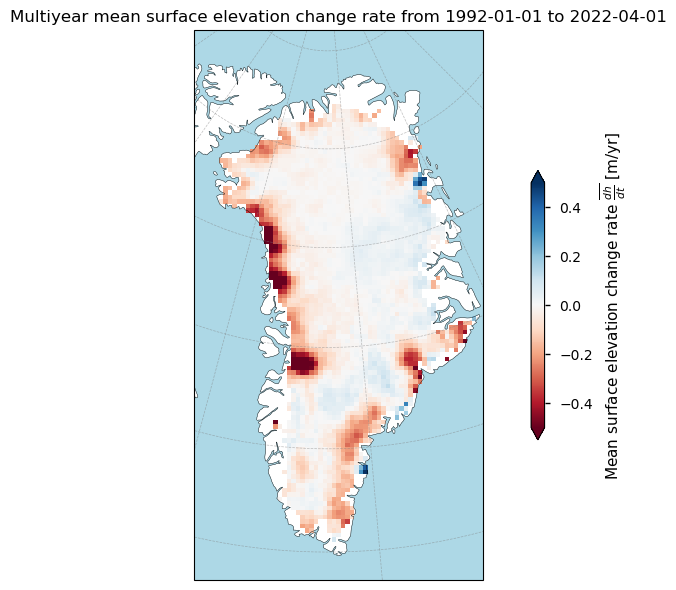

In [469]:
# Apply the function to the surface elevation change rate data
da = datasets["sec"]
da.attrs = {
    "long_name": r"Mean surface elevation change rate $\overline {\frac{dh}{dt}}$",
    "units": "m/yr",
}

# Define dataset to be plotted
suptitle_text = rf"Multiyear mean surface elevation change rate from {begin_period.date()} to {end_period.date()}"
_ = plot_maps_single(
    da,
    vmin=-0.5,
    vmax=0.5,
    suptitle=suptitle_text,
)


Overall, the map provides a visual representation of the changes of the surface elevation of Greenland's ice sheet over the last several decades. The red regions, particularly around the margins, indicate areas of significant surface lowering, which is consistent with observations of accelerated glacier flow and ice thinning in these regions (Simonsen and Sørensen 2017; Sørensen et al., 2018). The areas with positive elevation changes (blue) may be influenced by increased snowfall and the consequent thickening of the ice. Users should also keep in mind that also other processes besides surface melt and accumulation may contribute to surface height change (e.g. dynamic processes, basal processes, firn compaction/densification processes, isostatic adjustment, tidal regimes, etc. are all intertwined in the surface height change data), and hence that surface elevation (or volume) changes do not necessarily equal mass changes. It is, for example, the mass change of ice above floatation (and not necessarily surface elevation/volume changes) that is important to derive global sea level contributions.

Let us quantify the ice sheet-wide average value:

In [470]:
print(f'The Greenland ice sheet-wide average surface elevation change rate value between {begin_period.date()} and {end_period.date()} is {(np.nanmean(da.values)):.5f} m/yr.')

The Greenland ice sheet-wide average surface elevation change rate value between 1992-01-01 and 2022-04-01 is -0.05007 m/yr.


The negative value indicates that the surface of the ice sheet, in general, has been lowering during the last several decades, resulting in net negative values.

Let us express this as a time series:

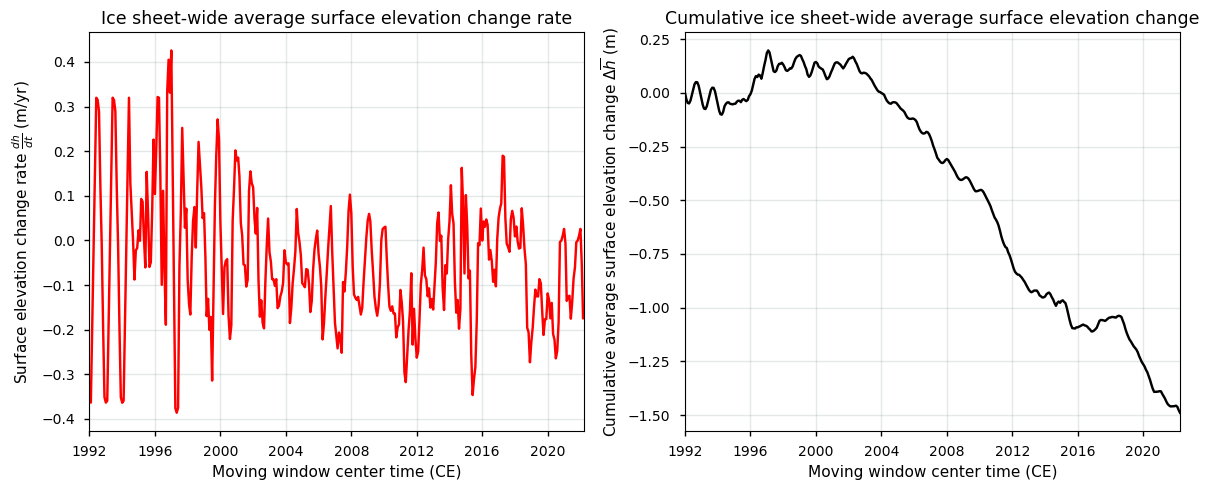

In [471]:
# Define the function
def get_timeseries(ds):
    ds["time"].attrs["long_name"] = "Time"

    (sec_name,) = set(ds.data_vars) & {"sec", "dhdt"}
    da = ds[sec_name]
    da.attrs["long_name"] = "Surface elevation change rate"

    if 'greenland' in domains:
        da_dh = ds["dh"]
        da_dh.attrs["long_name"] = "Surface elevation change"
        da_dh.attrs["units"] = "m"
        da_vol = (da*ds["area"])/1e9
        da_vol.attrs["long_name"] = "Volume change rate"
        da_vol.attrs["units"] = "km³"

    da_err = ds[f"{sec_name}_uncert"]
    da_err.attrs["long_name"] = "Surface elevation change rate error"

    (mask_name,) = set(ds.data_vars) & {"land_mask", "surface_type"}
    mask = ds[mask_name] > 0
    missing = 100 * (mask.sum() - da.notnull().sum(("x", "y"))) / mask.sum()
    missing.attrs = {"long_name": "Missing data", "units": "%"}

    data_vars = [
        da.rename("sec"),
        da_err.rename("sec_err"),
        missing.rename("missing"),
    ]

    if 'greenland' in domains:
        data_vars.append(da_dh.rename("dh"))
        data_vars.append(da_vol.rename("dvol"))

    ds = xr.merge(data_vars)

    # Apply mean to all variables except 'dvol', which will use sum
    mean_ds = ds.drop_vars('dvol').mean(("x", "y"), keep_attrs=True)
    sum_dvol = ds['dvol'].sum(("x", "y"), keep_attrs=True)
    
    # Combine the results
    ds = xr.merge([mean_ds, sum_dvol])

    return ds

selected_ds = datasets_original["greenland"]
datasets_timeseries = get_timeseries(selected_ds)

# Plot the data
datasets_timeseries["time"].attrs["units"] = "yr"
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.plot(datasets_timeseries["time"],datasets_timeseries["sec"],'r')
ax1.grid(color='#95a5a6',linestyle='-',alpha=0.25)
ax1.set_xlim(np.min(datasets_timeseries["time"]),np.max(datasets_timeseries["time"]))
ax1.set_xlabel("Moving window center time (CE)")
ax1.set_ylabel(r"Surface elevation change rate $\frac{dh}{dt}$ (m/yr)")
ax1.set_title("Ice sheet-wide average surface elevation change rate",fontsize=12.5);
ax2.plot(datasets_timeseries["time"],(datasets_timeseries["dh"]),'k')
ax2.grid(color='#95a5a6',linestyle='-',alpha=0.25)
ax2.set_xlim(np.min(datasets_timeseries["time"]),np.max(datasets_timeseries["time"]))
ax2.set_xlabel("Moving window center time (CE)")
ax2.set_ylabel("Cumulative average surface elevation change $\Delta \overline{h}$ (m)")
ax2.set_title("Cumulative ice sheet-wide average surface elevation change",fontsize=12.5);
plt.tight_layout()
plt.show()

Remember here that the x-axis shows the centered time of a 3-year or 5-year moving window used to derive the surface elevation change values. The figures demonstrate the significant changes in the Greenland Ice Sheet's surface elevation over the last several decades. The left plot highlights the variability in surface elevation change rates, with recent years showing an almost consistent surface lowering on average. The right plot accumulates these changes, underscoring a clear long-term trend of ice sheet thinning. This trend is particularly pronounced in the last decade, which aligns with observations of increasing temperatures, dynamic thinning and climate change impacts in the polar regions (e.g. Pritchard et al., 2009; IMBIE Team, 2019; Fox-Kemper et al., 2021). 

We can also convert the surface elevation change values to cumulative volume changes by combining the variables `dh` and `area`:

$\Delta V_t 
$
[m$^{3}$]
$ = \sum^{x,y}\Delta {V_{x,y}} = \sum^{x,y}(\Delta {h_{x,y}}*A_{x,y})$ 

where $\Delta {h_{x,y}}$ is the relative height change between two measurement intervals $t$ (from `dh`, in m) and $A_{x,y}$ the surface area (from `area`, in m$^2$) of pixel $x,y$.

We then take the cumulative value over time:

$
{V} 
$
[km$^{3}$]
$
= \sum_{i={1992}}^{{{n}}} (\frac{\Delta V_t}{1 \cdot 10^9})
$

with $\Delta V_t$ the ice sheet-wide volume change (in m$^{3}$) between two measurements $t$ (as calculated above) and $n$ the number of temporal intervals in the time series.

Let us plot this:

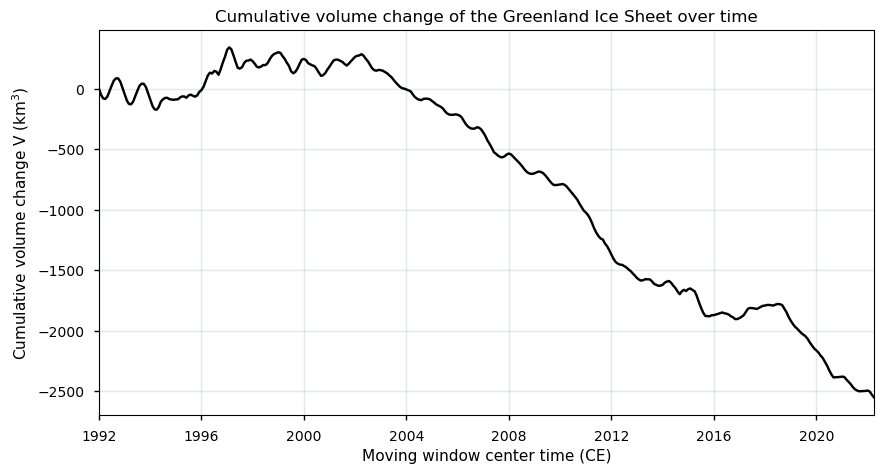

In [472]:
# Given datasets_original is the dataset dictionary
greenland_dataset = datasets_original['greenland']

# Extract the 'dh' and 'area' variables
dh_variable = greenland_dataset['dh']
area_variable = greenland_dataset['area']

# Sum over the x and y dimensions and convert to km^3
dh_summed_time_series = (area_variable*dh_variable).sum(dim=['x', 'y'])/(1e9)
dh_summed_time_series.attrs = {
    "long_name": r"Cumulative volume change",
    "units": "km³",
}

# Plot the resulting time series
fig, ax = plt.subplots(figsize=(10, 5))
dh_summed_time_series.plot(color='black')
plt.title('Cumulative volume change of the Greenland Ice Sheet over time')
ax.set_xlim(np.min(datasets_timeseries["time"]),np.max(datasets_timeseries["time"]))
ax.set_xlabel("Moving window center time (CE)")
plt.ylabel('Cumulative volume change V (km$^3$)')
plt.grid(color='#95a5a6',linestyle='-',alpha=0.25)
plt.show()

As expected, the plot shows a similar pattern of volume changes with a clear trend towards volume losses over time, especially during the more recent years.

Let us now consider the errors of the data. The total error of a surface elevation change estimate is theoretically given by the sum of the precision (random) and the accuracy (systematic) error:

$
\varepsilon = \sigma + \delta
$
where $\sigma$ is the random error (i.e. standard deviation) and $\delta$ the systematic error. 

In the surface elevation change dataset, precision errors are reported as the standard deviation (i.e. the 68% confidence interval) and the accuracy error is not considered. Therefore, in our case, $\delta$ = 0, meaning that $\varepsilon_{\frac{dh}{dt}}$ = $\sigma_{\frac{dh}{dt}}$. 

Let us now explore a bit more the uncertainty of the data. Quantitative pixel-by-pixel error estimates are namely available for the dataset. Let us begin by plotting a histogram of the error values:

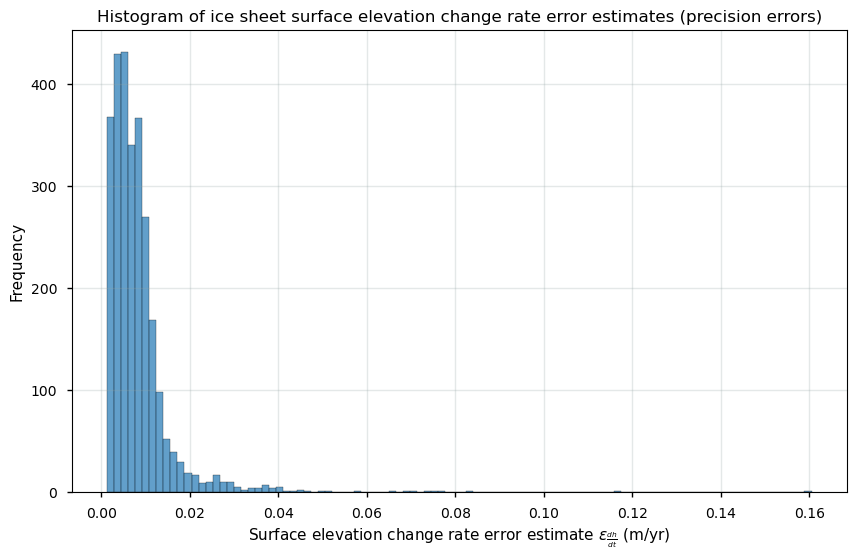

In [473]:
plt.figure(figsize=(10, 6))
error_data = (datasets['sec_err'].values.flatten())
plt.hist(error_data, bins=100, edgecolor='black', alpha=0.7)
plt.title('Histogram of ice sheet surface elevation change rate error estimates (precision errors)')
plt.xlabel(r'Surface elevation change rate error estimate $\varepsilon_{\frac{dh}{dt}}$ (m/yr)')
plt.ylabel('Frequency')
plt.grid(color='#95a5a6',linestyle='-',alpha=0.25)
plt.show()

Most errors (standard deviations) seem to be situated between 0 and 0.01 m/yr. To get a better idea, we can also plot the arithmetic mean values over time for each pixel to check their spatial distribution:

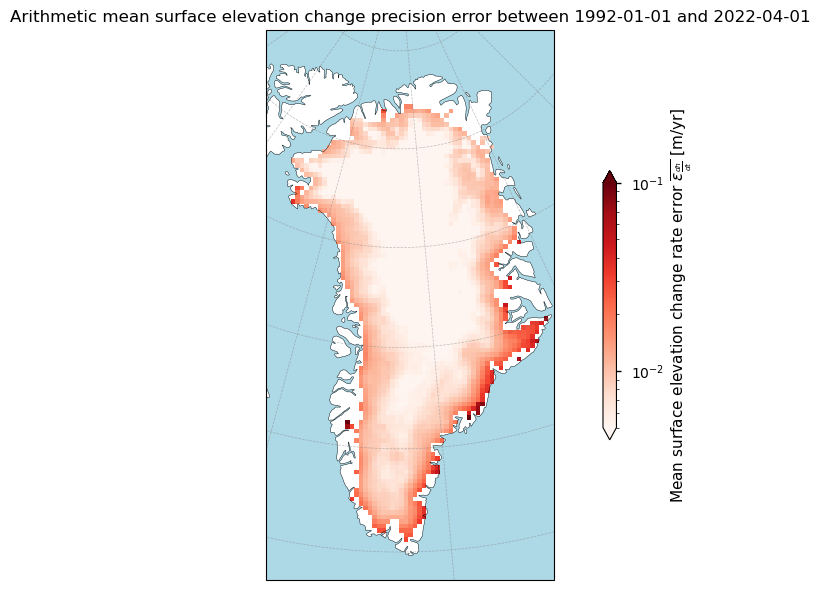

In [474]:
# Apply the function to the surface elevation change rate error data
da = datasets["sec_err"]
da.attrs = {
    "long_name": r"Mean surface elevation change rate error $\overline {\epsilon_{\frac{dh}{dt}}}$",
    "units": "m/yr",
}

# Plot the data
suptitle_text = rf"Arithmetic mean surface elevation change precision error between {begin_period.date()} and {end_period.date()}"
_ = plot_maps_single(
    da,
    cmap="Reds",
    vmin=0.005,
    vmax=0.1,
    norm=colors.LogNorm(),
    suptitle=suptitle_text,
)


Let us quantify the ice sheet-wide average value:

In [475]:
print(f'The Greenland ice sheet-wide average surface elevation change rate error (standard deviation) between {begin_period.date()} and {end_period.date()} is {(np.nanmean(da.values)):.3f} m/yr.')

The Greenland ice sheet-wide average surface elevation change rate error (standard deviation) between 1992-01-01 and 2022-04-01 is 0.008 m/yr.


We can accordingly plot the data as a time series:

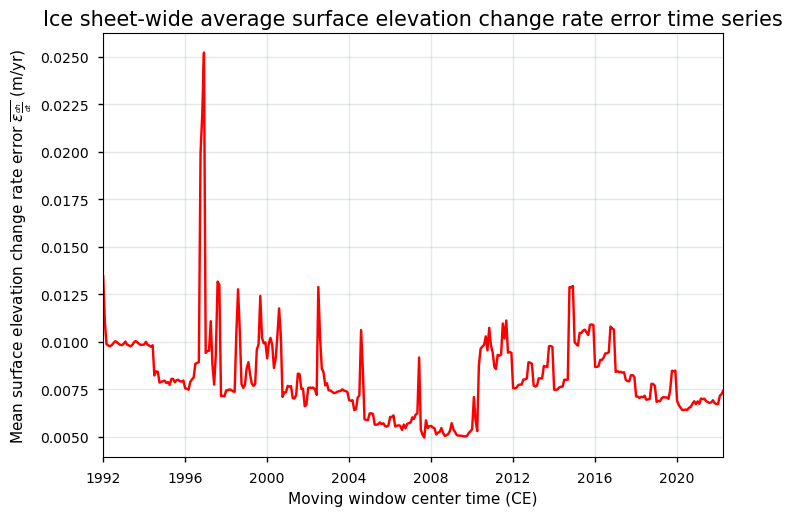

In [476]:
fig, ax = plt.subplots()
ax.plot(datasets_timeseries["time"],datasets_timeseries["sec_err"],'r')
ax.grid(color='#95a5a6',linestyle='-',alpha=0.25)
ax.set_xlim(np.min(datasets_timeseries["time"]),np.max(datasets_timeseries["time"]))
ax.set_xlabel("Moving window center time (CE)")
ax.set_ylabel(r"Mean surface elevation change rate error $\overline {\epsilon_{\frac{dh}{dt}}}$ (m/yr)")
ax.set_title("Ice sheet-wide average surface elevation change rate error time series",fontsize=15);
plt.show()

Given that the GCOS (2022) requires a precision error threshold (expressed as 2$\sigma$) of at least 0.1 m/yr, it can be stated that this requirement is clearly met for the Greenland Ice Sheet. The uncertainty in surface elevation change rate for the Greenland Ice Sheet arises from two main sources: measurement errors (which include errors due to radar penetration depth into ice, firn or snow, satellite characteristics and location, atmospheric attenuation, etc.) and fitting errors in the surface elevation change modelling. The largest error source is, however, the geolocation of the radar echo, which biases estimates particularly in complex topographies. This is because the surface elevation change estimate results from the highest points within the radar's footprint during data acquisition. This pattern is clearly shown when plotting the errors against the surface slope classes:

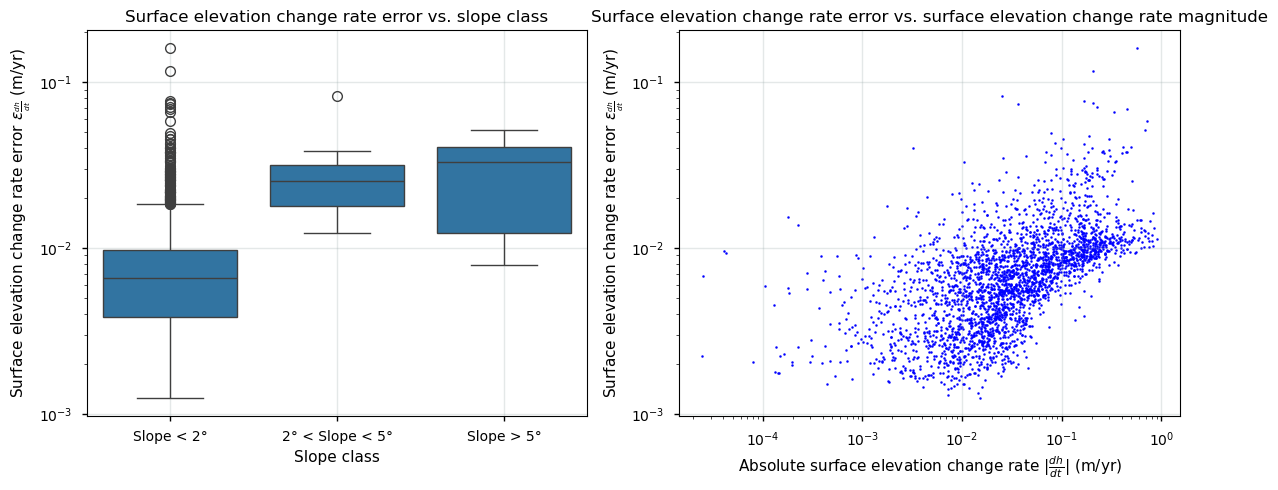

In [486]:
datasets = {
    'high_slope': datasets['high_slope'],  
    'sec_err': datasets['sec_err'],
    'sec': datasets['sec']
}

# Flatten the arrays and remove NaN values for the boxplot
df = pd.DataFrame({
    'slopemask_gris': np.ravel(datasets["high_slope"]),
    'mean_sec_err_gris': np.ravel(datasets["sec_err"])
}).dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot
sns.boxplot(data=df, x='slopemask_gris', y='mean_sec_err_gris', ax=ax1)
ax1.set_ylabel(r'Surface elevation change rate error $\varepsilon_{\frac{dh}{dt}}$ (m/yr)')
ax1.set_xlabel('Slope class')
ax1.set_title("Surface elevation change rate error vs. slope class")
ax1.set_xticks([0, 1, 2])
ax1.set_xticklabels(["Slope < 2°", "2° < Slope < 5°", "Slope > 5°"])
ax1.set_yscale('log')
ax1.grid(color='#95a5a6',linestyle='-',alpha=0.25)

# Scatter plot
sec_err = np.ravel(datasets["sec_err"])
sec = np.ravel(datasets["sec"])

# Remove NaN values for the scatter plot
mask = ~np.isnan(sec_err) & ~np.isnan(sec)
ax2.scatter(abs(sec[mask]), abs(sec_err[mask]), color='blue', s=2)
ax2.set_xlabel(r'Absolute surface elevation change rate $|\frac{dh}{dt}|$ (m/yr)')
ax2.set_ylabel(r'Surface elevation change rate error $\varepsilon_{\frac{dh}{dt}}$ (m/yr)')
ax2.set_title("Surface elevation change rate error vs. surface elevation change rate magnitude")
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.grid(color='#95a5a6',linestyle='-',alpha=0.25)

plt.tight_layout()
plt.show()


Hence, in general, radar altimeters used to derive surface elevation changes perform more accurately in the central, flat regions of the Greenland ice sheet, which have a simpler topography and a more stable surface, compared to the coastal areas with a more complex terrain (with steep slopes, valleys and ridges and large seasonal cycles of melt and accumulation). As a result, precision errors tend to be larger around the margins of the ice sheets (e.g. Paul et al., 2017). The standard deviation is also shown to clearly increase with an increasing magnitude of the surface elevation change rate itself. This may be, amongst others, related to rapid and extensive changes of the surface characteristics (e.g. variations in radar penetration depth due to extensive melting, or else by a steepening of the surface slope), hence complicating proper comparison of the surface elevation between different acquisition times.

Radar altimeters, in contrast to laser altimeters, provide, for example, measurements in all weather conditions, but in contrast have a much larger footprint during data acquisition, which results in a less finer precision of the measurements. This especially provides difficulties around the margins, where complex and high-slope terrain prevails. The radar signal can furthermore penetrate into the snowpack until a certain depth, depending on the properties of the snow layers and the frequency of the sensor. Snow melting allows, for example, for variable snowpack penetration depths of the radar pulse (e.g. due to a changing liquid water content or refrozen ice lenses), hence possibly introducing artificial elevation changes (i.e. for example when the radar pulse is reflected from liquid water within the snowpack). 

Let us now quantify the amount of pixels that do not meet the GCOS precision error requirement of 0.1 m/yr. We therefore multiply the errors accompanying the data by 2 to get a precision error in the form of 2 standard deviations (as proposed by the GCOS):

In [487]:
ds = datasets_original['greenland']
dhdt_uncert = ds['dhdt_uncert']
num_pixels_below_threshold = (2*dhdt_uncert < 0.1).sum().item()
total_pixels = dhdt_uncert.count().item()
percentage_below_threshold = (num_pixels_below_threshold / total_pixels) * 100

print(f"The absolute number of pixels with a surface elevation change rate precision error (2σ) < 0.1 m/yr is {num_pixels_below_threshold} pixels or {percentage_below_threshold:.2f}%.")

The absolute number of pixels with a surface elevation change rate precision error (2σ) < 0.1 m/yr is 987436 pixels or 99.40%.


Let us have this plotted:

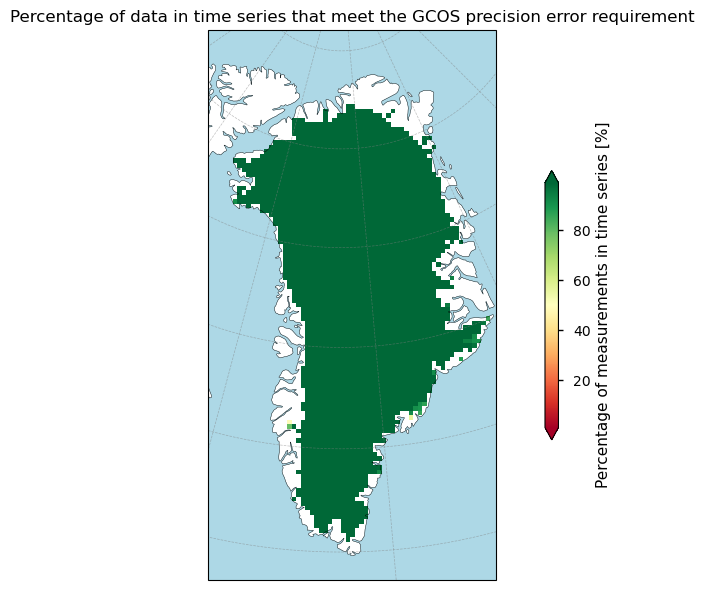

In [488]:
# Apply the function to the surface elevation change error data
ds = datasets_original['greenland']
dhdt_uncert = ds['dhdt_uncert']
below_threshold = (dhdt_uncert < 0.1).sum(dim='time')
total_observations = dhdt_uncert.notnull().sum(dim='time')
percentage_below_threshold = (below_threshold / total_observations) * 100
percentage_below_threshold = percentage_below_threshold.where(total_observations > 0)

da = percentage_below_threshold
da.attrs = {
    "long_name": r"Percentage of measurements in time series",
    "units": "%",
}

# Define bounds and colormap
suptitle_text = rf"Percentage of data in time series that meet the GCOS precision error requirement"
_ = plot_maps_single(
    da,
    cmap="RdYlGn",
    vmin=1,
    vmax=99,
    suptitle=suptitle_text,
)


Apart from some pixels near the margins, the GCOS precision error requirement is thus met over almost the entire ice sheet, ensuring a high-quality dataset in terms of the error. 

Let us combine this information and propagate the error throughout the time series of the cumulative volume change of the ice sheet, assuming uncorrelated errors in space and time:

$
\sigma_{\Delta{V_t}} 
$
[m$^3$]
$= \sqrt{\sum^{x,y}({A_{x,y} * \sigma_{\Delta{h_{x,y}}}})^2}
$

where $\sigma_{\Delta{h_{x,y}}}$ is the surface elevation change standard deviation (from `dh_uncert` in m) and $A_{x,y}$ the grid cell area (from `area` in m$^2$) at pixel $x,y$ between two measurements $t$, and

$
\sigma_{V} 
$
[km$^3$]
$
= \frac{1}{1 \cdot 10^9} \sqrt {\sum_{i={1992}}^{{{n}}} (\sigma_{\Delta{V_t}})^2}
$

where $\sigma_{\Delta{V_t}}$ is the volume change error between two measurements $t$ as calculated above and $n$ the number of temporal intervals in the time series.

Let us have this plotted:

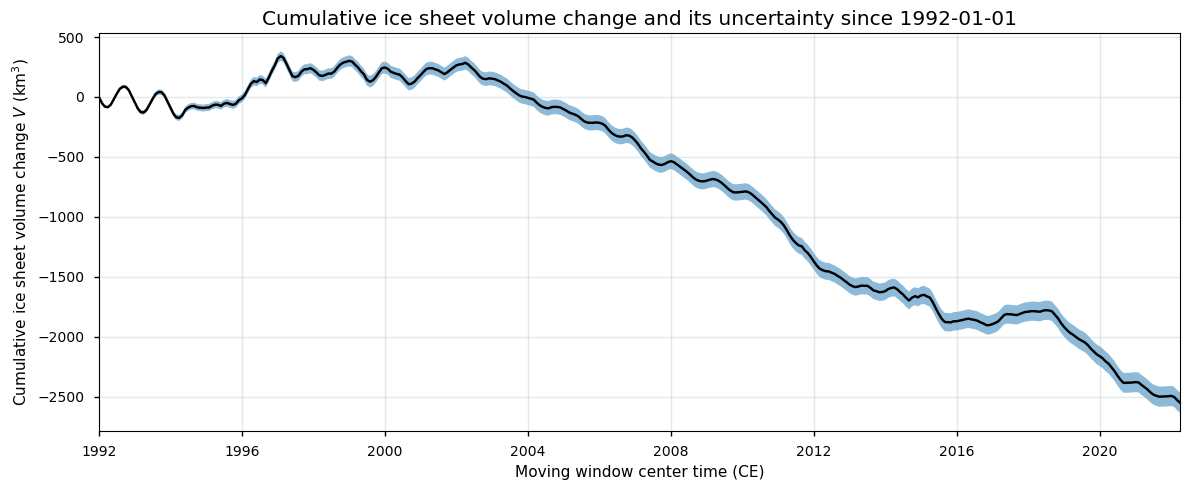

In [489]:
# Calculate the propagated uncertainty for each grid cell
propagated_uncertainty = (selected_ds['area'] * selected_ds['dh_uncert'])**2
# Sum these uncertainties over the x and y dimensions
summed_uncertainty = propagated_uncertainty.sum(dim=('x', 'y'))
# Take the square root of the summed uncertainties to get the total propagated uncertainty
total_uncertainty = np.sqrt(summed_uncertainty)
# Convert to a data array for better representation
total_uncertainty_da = xr.DataArray(total_uncertainty, dims=['time'], coords={'time': selected_ds['time']}, name='total_volume_uncertainty')
# Propagate through time
squared_uncertainties = total_uncertainty_da ** 2
cumulative_squared_uncertainties = squared_uncertainties.cumsum(dim='time')
cumulative_uncertainty = np.sqrt(cumulative_squared_uncertainties)/1e9

# Plot the cumulative uncertainty
fig, ax1 = plt.subplots(figsize=(12, 5))
line1 = dh_summed_time_series
error1 = cumulative_uncertainty
ax1.fill_between(line1["time"], line1 - error1, line1 + error1, alpha=0.5)
line1.plot(ax=ax1, color="k")
ax1.grid(color='#95a5a6',linestyle='-',alpha=0.25)
ax1.set_xlim(np.min(datasets_timeseries["time"]),np.max(datasets_timeseries["time"]))
ax1.set_xlabel("Moving window center time (CE)")
ax1.set_ylabel("Cumulative ice sheet volume change $V$ (km$^3$)")
ax1.set_title(f"Cumulative ice sheet volume change and its uncertainty since {begin_period.date()}", fontsize=14.5);
plt.tight_layout()

When expressed in actual values, this becomes:

In [481]:
print(f'The total Greenland ice sheet-wide volume change between {begin_period.date()} and {end_period.date()} is {(dh_summed_time_series[-1]):.2f} ± {(cumulative_uncertainty[-1]):.2f} km³.')

The total Greenland ice sheet-wide volume change between 1992-01-01 and 2022-04-01 is -2550.52 ± 84.52 km³.


Note that due to potential spatial and temporal autocorrelation, the error in the above estimate (assuming independent errors) might be underestimated.

As stated before, accuracy errors are not included in the total error estimate of the Greenland surface elevation change dataset. To get an estimate of the accuracy, the ECMWF Confluence Wiki can be consulted, as it provides a summary of a validation procedure with independent external data. This procedure involved comparisons with data from NASA's Operation IceBridge (OIB) (Studinger, 2014) and ICESat-2 ATL15 (Smith et al., 2021). The validation demonstrated good agreement with minimal differences. Key results include:

- Comparisons with OIB data showed a mean bias of all observations of ca. 0.02 m/yr.
- Validation against ICESat-2 data showed median differences in the order of 0.02-0.06 m/yr.

These results indicate that the dataset aligns well with external independent data, though some accuracy errors may arise from the source data characteristics, varying external factors during data acquisition, different algorithm applications and settings, and post-processing procedures.

Let us now check the amount of missing data in the dataset (i.e. data completeness).

### ✅ Checking the amount of missing data to inspect data completeness 

In this subsection, we focus on inspecting the data completeness of the Greenland surface elevation change dataset. By quantifying the amount of missing data, we can assess the robustness of the dataset and identify potential gaps that may need to be addressed in further analyses. Ensuring data completeness is namely crucial for accurate analysis and interpretation of surface elevation changes over time. In the dataset, this can be assessed comparing the amount of pixels with valid data to the land mask (`land_mask`), where pixels with a value of 1 represent ice-covered grid points of the main ice sheet body.

We begin by quantifying the total ice-covered area that involves the `land_mask` variable by combining it with the given pixel surface area `area`:

In [490]:
# Get area_variable and land_mask 
land_mask = greenland_dataset['land_mask'].values
area_variable = greenland_dataset['area'].values

# Create a mask where land_mask equals 1
mask = land_mask == 1

# Apply the mask to area_variable and sum the values
total_ice_covered_area_km2 = np.nansum(area_variable[mask]) / 1e6

# Print the result
print(f"The total ice-covered area over the Greenland Ice Sheet in the dataset is {total_ice_covered_area_km2:.2f} km².")

The total ice-covered area over the Greenland Ice Sheet in the dataset is 1726797.19 km².


Let us now plot the amount of missing data within the ice-covered mask as a time series:

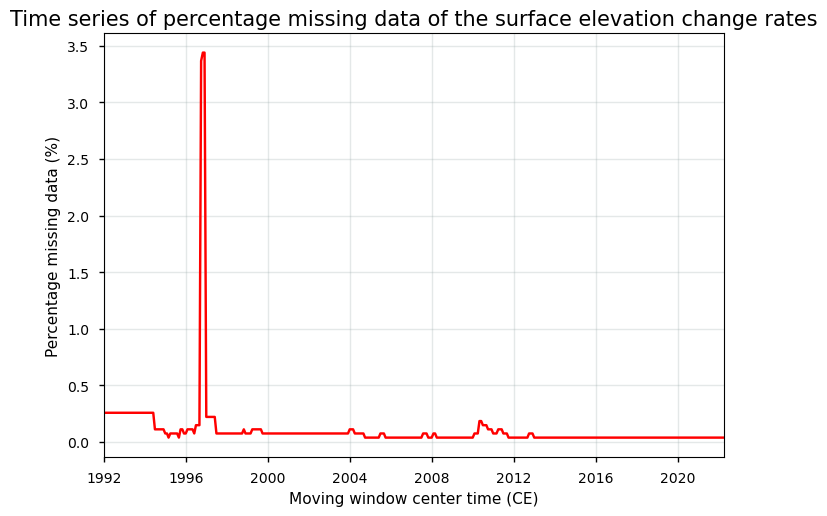

In [491]:
fig, ax = plt.subplots()
ax.plot(datasets_timeseries["time"],datasets_timeseries["missing"],'r')
ax.grid(color='#95a5a6',linestyle='-',alpha=0.25)
ax.set_xlim(np.min(datasets_timeseries["time"]),np.max(datasets_timeseries["time"]))
ax.set_xlabel("Moving window center time (CE)")
ax.set_ylabel("Percentage missing data (%)")
ax.set_title("Time series of percentage missing data of the surface elevation change rates",fontsize=15);
plt.show()

For the GrIS, most spatial data gaps have been filled by interpolation and the spatial coverage extends approximately over the entire ice sheet. The data and the pixels in the land mask, however, do not include peripheral glaciers and ice caps. In summary, the figure highlights a notable data gap around 1997, but otherwise indicates a stable and low percentage of missing data for the surface elevation change rates of the GrIS over the last several decades. This overall indicates that the data is complete in terms of its spatial and temporal coverage, which ensures a high-quality dataset that is crucial for accurate and reliable analysis of surface elevation changes over time.

Let us have the spatial distribution plotted:

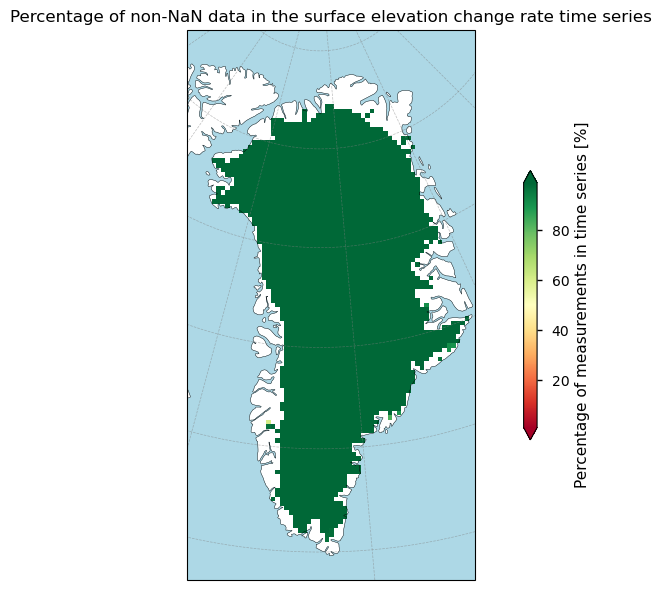

In [506]:
# Apply the function to the surface elevation change error data
da = xr.where(datasets_get_maps["sec"].isnull(), np.nan, 100-datasets_get_maps["missing"])
da.attrs = {
    "long_name": r"Percentage of measurements in time series",
    "units": "%",
}

# Plot the data
suptitle_text = rf"Percentage of non-NaN data in the surface elevation change rate time series"
_ = plot_maps_single(
    da,
    cmap="RdYlGn",
    vmin=1,
    vmax=99,
    suptitle=suptitle_text,
)


Most pixels of the Greenland Ice Sheet exhibit a complete time series of data, indicating a comprehensive and reliable dataset for most areas. Some coastal regions show slightly lower percentages of data (shading towards yellow and red in the color scheme), suggesting the presence of few data gaps or missing data in these regions.

Since most data gaps have been filled up, we can use the variable `dist` in the original data to check the distance to to the nearest observational node (in m). The larger the average distance over time, the higher the chance that (part of the time series of) pixels in these locations have been filled up by interpolation:

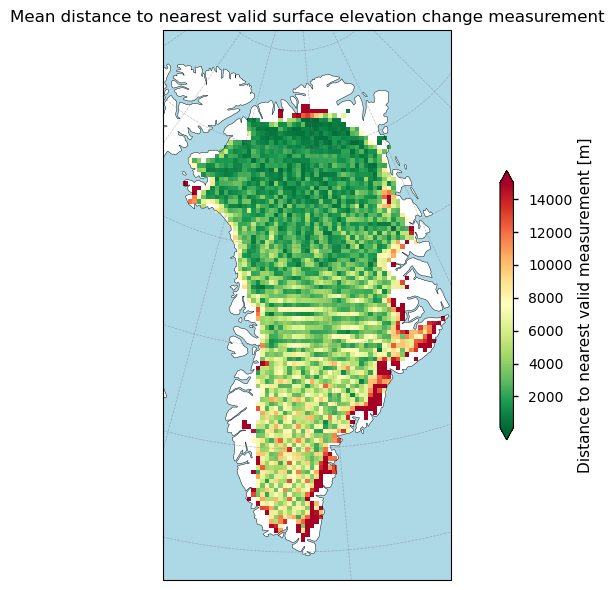

In [504]:
# Apply the function to the surface elevation change distance data
da = datasets_get_maps["dhdt_distance"]
da.attrs = {
    "long_name": r"Distance to nearest valid measurement",
    "units": "m",
}

# Plot the data
suptitle_text = rf"Mean distance to nearest valid surface elevation change measurement"
_ = plot_maps_single(
    da,
    cmap="RdYlGn_r",
    vmin=100,
    vmax=15000,
    suptitle=suptitle_text,
)


Let us again express this in terms of the surface slope classes:

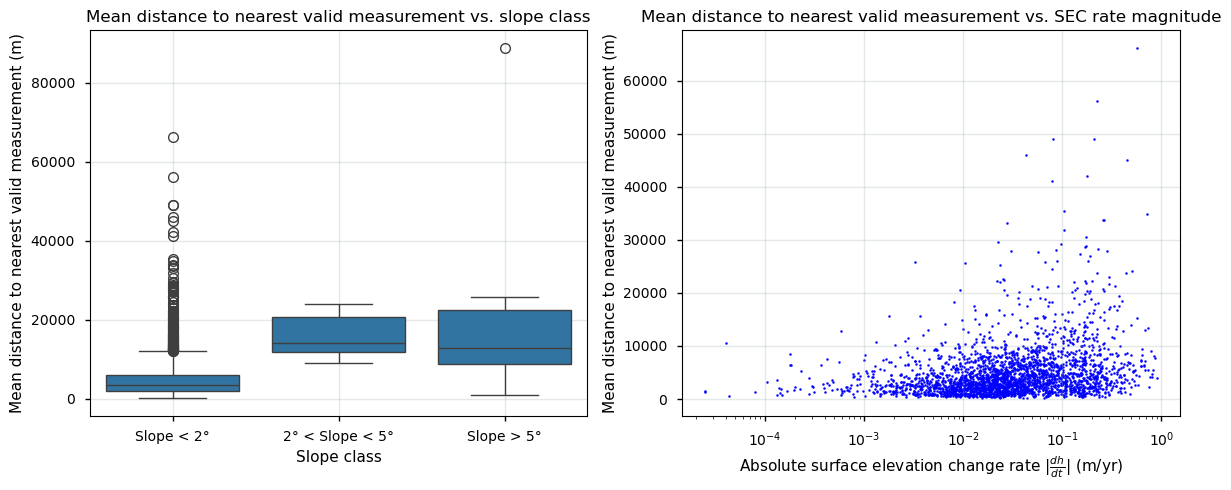

In [502]:
datasets = {
    'high_slope': datasets_get_maps['high_slope'],  
    'dhdt_distance': datasets_get_maps['dhdt_distance'],
    'sec': datasets_get_maps['sec'],
}

# Flatten the arrays and remove NaN values for the boxplot
df = pd.DataFrame({
    'slopemask_gris': np.ravel(datasets["high_slope"]),
    'dhdt_distance_gris': np.ravel(datasets["dhdt_distance"])
}).dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot
sns.boxplot(data=df, x='slopemask_gris', y='dhdt_distance_gris', ax=ax1)
ax1.set_ylabel(r'Mean distance to nearest valid measurement (m)')
ax1.set_xlabel('Slope class')
ax1.set_title("Mean distance to nearest valid measurement vs. slope class")
ax1.set_xticks([0, 1, 2])
ax1.set_xticklabels(["Slope < 2°", "2° < Slope < 5°", "Slope > 5°"])
ax1.grid(color='#95a5a6',linestyle='-',alpha=0.25)

# Scatter plot
sec_err = np.ravel(datasets["dhdt_distance"])
sec = np.ravel(datasets["sec"])

# Remove NaN values for the scatter plot
mask = ~np.isnan(sec_err) & ~np.isnan(sec)
ax2.scatter(abs(sec[mask]), abs(sec_err[mask]), color='blue', s=2)
ax2.set_xlabel(r'Absolute surface elevation change rate $|\frac{dh}{dt}|$ (m/yr)')
ax2.set_ylabel(r'Mean distance to nearest valid measurement (m)')
ax2.set_title("Mean distance to nearest valid measurement vs. SEC rate magnitude")
ax2.set_xscale('log')
ax2.grid(color='#95a5a6',linestyle='-',alpha=0.25)

plt.tight_layout()
plt.show()

Again, the same pattern is noted: pixels near the margin (where high-slope terrain prevails) have a larger probability of having been filled up by interpolation. We also note that values above a latitude of 81.5°N have been filled up, which is the northernmost location of the main ice sheet body, due to the "polar gap" of the ERS-1, ERS-2, and Envisat satellite missions. Early satellite missions like ERS-1, ERS-2, and Envisat namely had coverage limitations over higher latitudes (north of 81.5°N).

With all the information above, let us now go on and calculate linear and quadratic trends for the ice sheet surface elevation change product.

### ❄️ Spatial distribution of ice sheet surface elevation change (linear and quadratic) trends

In this subsection, we explore the spatial distribution of surface elevation change rate trends across the Greenland Ice Sheet. By examining both linear and quadratic trends, a comprehensive understanding of how the ice sheet's surface elevation has evolved over time can be assessed. The linear trends highlight the overall direction and magnitude of elevation changes, while the quadratic trends reveal any acceleration or deceleration in these changes. Let us start by exploring the linear trends:

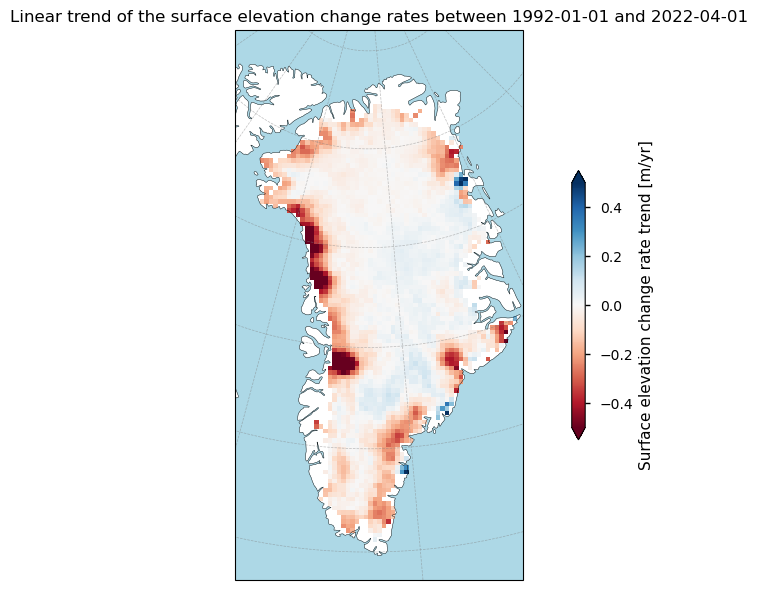

In [425]:
# Apply the function to the surface elevation change linear trends
da = xr.where(datasets_get_maps["sec"].isnull(), np.nan, datasets_get_maps["linear_trend"])  
da.attrs = {
    "long_name": r"Surface elevation change rate trend",
    "units": "m/yr",
}

# Plot the data
suptitle_text = rf"Linear trend of the surface elevation change rates between {begin_period.date()} and {end_period.date()}"
_ = plot_maps_single(
    da,
    vmin=-0.5,
    vmax=0.5,
    suptitle=suptitle_text,
)

The maps shows a similar pattern as the multiyear mean surface elevation change rates. Hence, it reveals significant surface elevation decreases especially along the western coast of Greenland, suggesting a substantial surface lowering in these regions. In contrast, the eastern coast shows mixed trends, with localized areas of both increase and decrease in surface elevation. The central regions of Greenland mostly exhibit neutral or slightly positive trends, indicating stable or slightly increasing surface elevation. The observed patterns highlight regional variability in surface elevation change trends, with coastal areas experiencing more substantial changes compared to interior regions. The data align with expected climate change impacts, where warming temperatures lead to increased melting and surface lowering, particularly in the low-elevation coastal areas (Simonsen and Sørensen 2017; Sørensen et al., 2018).

Let us now consider quadratic trends (accelerations):

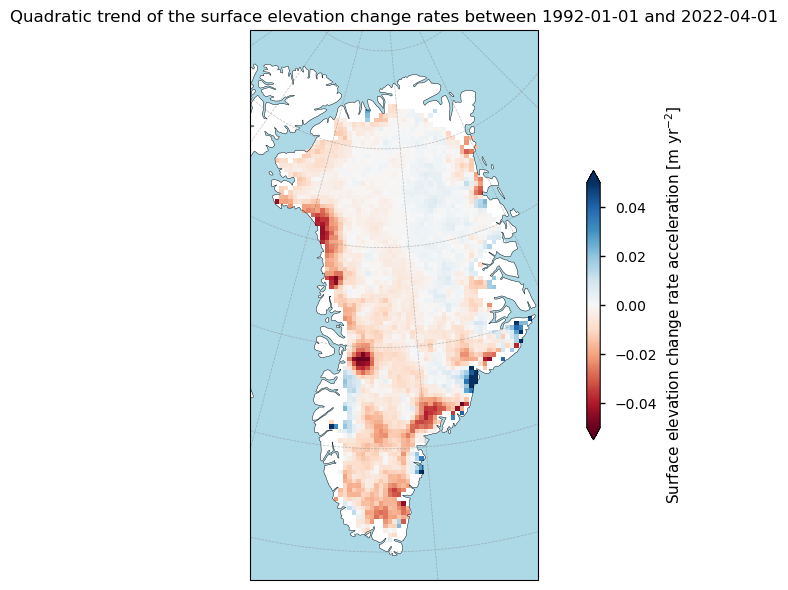

In [426]:
# Apply the function to the surface elevation change quadratic trends
da = xr.where(datasets_get_maps["sec"].isnull(), np.nan, datasets_get_maps["acceleration"])  
da.attrs = {
    "long_name": r"Surface elevation change rate acceleration",
    "units": "m yr$^{-2}$",
}

# Plot the data
suptitle_text = rf"Quadratic trend of the surface elevation change rates between {begin_period.date()} and {end_period.date()}"
_ = plot_maps_single(
    da,
    vmin=-0.05,
    vmax=0.05,
    suptitle=suptitle_text,
)

Again, the observed patterns highlight a clear regional variability in the acceleration and deceleration of surface elevation change rates. Coastal areas show more substantial changes in the acceleration of elevation change rates compared to central regions, which tend to be more stable. 

Let us now quantify the ice sheet-wide surface elevation change and volume change trends:

The slope of the ice sheet cumulative average surface elevation change is -0.056 m/yr.
The trend is significant at an alpha level of 0.05, i.e. a monotonic linear trend is present.
The acceleration of the ice sheet cumulative average surface elevation change is -0.005 m/yr^2.
The slope of the ice sheet cumulative volume change is -95.628 km³/yr.
The trend is significant at an alpha level of 0.05, i.e. a monotonic linear trend is present.
The acceleration of the ice sheet cumulative volume change is -7.857 km³/yr^2.


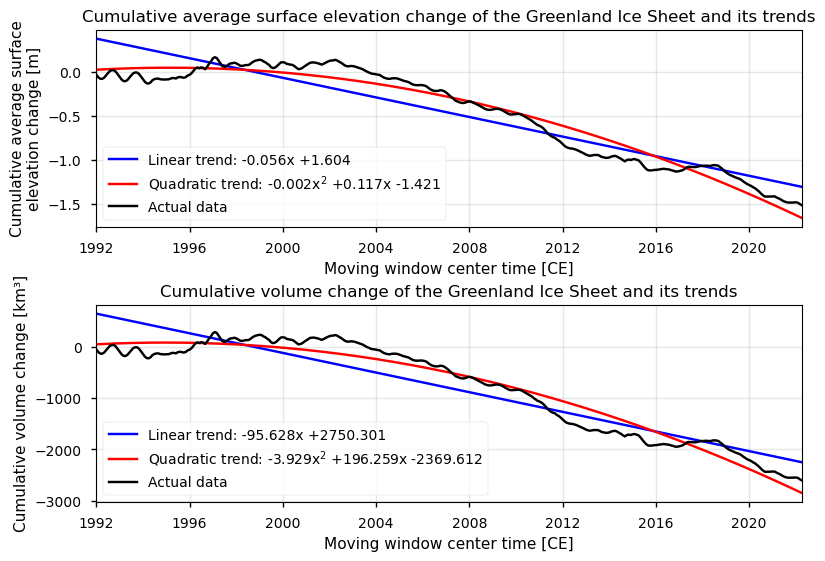

In [427]:
def plot_trends(datasets, varname):
    year_to_ns = 1.0e9 * 60 * 60 * 24 * 365

    fig, axs = plt.subplots(len(datasets), 1, layout="constrained", squeeze=False)
    for ax, (region, ds) in zip(axs.flatten(), datasets.items()):
        ds["time"].attrs["units"] = "CE"
        ds["time"].attrs["long_name"] = "Moving window center time"
        with xr.set_options(keep_attrs=True):
            da = ds[varname].cumsum("time") / 12
        da.attrs["units"] = da.attrs["units"].split("/", 1)[0]
        for label, degree, color in zip(
            (
                "Linear trend",
                "Quadratic trend",
            ),
            (1, 2),
            ('blue', 'red'),  # Specify colors for each trend
        ):
            # Compute coefficients
            coeffs = da.polyfit("time", degree)["polyfit_coefficients"]

            # Plot trends and print stats
            equation = []
            for deg, coeff in coeffs.groupby("degree"):
                coeff = coeff.squeeze() * (year_to_ns**deg)
                if deg == degree:
                    if deg == 1:
                        quantity = "slope"
                        units = f"{da.attrs['units']}/yr"
                    elif deg == 2:
                        quantity = "acceleration"
                        units = f"{da.attrs['units']}/yr^2"
                    else:
                        raise ValueError(f"{deg=}")
                    print(
                        f"The {quantity} of the ice sheet {da.attrs['long_name'].lower()} "
                        f"is {degree*coeff:.3f} {units}."
                    )
                    if deg == 1:
                        _, p_value = scipy.stats.kendalltau(da["time"], da)
                        s_lev = 0.05
                        is_significant = p_value < s_lev
                        print(
                            " ".join(
                                [
                                    "The trend",
                                    "is significant"
                                    if is_significant
                                    else "is not significant",
                                    f"at an alpha level of {s_lev}, i.e. a monotonic linear trend",
                                    "is present."
                                    if is_significant
                                    else "is not present.",
                                ]
                            )
                        )
                equation.append(
                    f"{float(coeff):+.3f}{'x' if deg else ''}{f'$^{deg}$' if deg>1 else ''}"
                )
            label = f"{label}: {' '.join(equation[::-1])}"
            fit = xr.polyval(da["time"], coeffs)
            fit.plot(label=label, ax=ax, color=color)
        da.plot(label="Actual data", ax=ax, color='black')
        ax.set_xlim(np.min(da["time"]),np.max(da["time"]))
        ax.set_title(f"{ds[varname].attrs['long_name']} of the Greenland Ice Sheet and its trends")
        ax.grid(color='#95a5a6',linestyle='-',alpha=0.25)
        ax.legend()

    return fig, axs

datasets_timeseries_trends = datasets_timeseries.drop_vars([var for var in datasets_timeseries.data_vars if var != 'sec'])
datasets_timeseries_trends["sec"].attrs = {
    "long_name": r"Cumulative average surface elevation change",
    "units": "m",
}
datasets_timeseries_trends = datasets_timeseries_trends.assign(dh_summed=datasets_timeseries["dvol"])
datasets_timeseries_trends["dh_summed"].attrs = {
    "long_name": r"Cumulative volume change",
    "units": "km³",
}
fig, axs = plot_trends(datasets_timeseries_trends, ~np.isnan(datasets_timeseries_trends["sec"]))

As seen earlier, the significant negative and downward trend, for both the linear and quadratic trend, implies that the surface is generally lowering over the Greenland Ice Sheet, and that this lowering has been accelerating over the past several decades. Although surface elevation changes are not solely impacted by surface mass balance processes, the observed trends are consistent with the expected impacts of climate change, where rising global temperatures result in increased surface melting. 

### 📌 Implications for deriving reliable values for ice sheet surface elevation and volume change variability and trends

When measured over an extended period and over the complete ice sheet, trends in Greenland Ice Sheet surface elevation (and the corresponding volume) changes can serve as a clear indicator of global climate change. To ensure these trends are accurate, representative, and reliable, the dataset should exhibit sufficient precision, accuracy and spatial/temporal completeness.

From the analysis above, it can be stated that dataset for the Greenland Ice Sheet meets the above-mentioned criteria well. It spans more than 30 years, providing a robust temporal extent that aligns with the Intergovernmental Panel on Climate Change (IPCC) standard for climate normals and trend analysis. This extended period ensures that the analysis captures meaningful changes rather than short-term fluctuations. Although the dataset's spatial resolution of 25 km is not in line with minimal thresholds proposed by the GCOS (2022), it is sufficiently adequate to capture local, regional and ice sheet-wide variations in surface elevation change and volume change rates. The monthly temporal resolution furthermore allows for detailed temporal analysis, which is critical for identifying both monthly/seasonal patterns and longer-term trends. Apart from that, the comprehensive spatial and temporal coverage of the dataset is another significant strength. With almost no spatially or temporally missing data (as most data gaps have been filled up), the dataset provides a continuous and complete record of surface elevation changes across the Greenland Ice Sheet since 1992. This completeness is crucial for ensuring that trends are not biased by data gaps and that the analysis can provide a consistent and comprehensive view of the ice sheet's behavior over time.

However, it is essential to note that the error in the data, as well as the percentage of filled-up data by interpolation, tends to be higher at the margins of the ice sheet. These marginal areas are often characterized by more complex terrain, variable surface characteristics and dynamic ice flow patterns, which can lead to greater measurement uncertainties. For example, in these areas there is an increased risk of slope errors, and snow melting allows, for example, for variable snowpack penetration depths of the radar pulse (e.g. due to a changing liquid water content or refrozen ice lenses), hence possibly introducing artificial elevation changes. In these areas, relatively higher errors can therefore be found (e.g. Paul et al., 2017). Despite this, the overall magnitude of the precision error is in line with expectations from GCOS (2022), ensuring that the quality of the dataset remains high. The observed variability and multi-year trends are thus quality-rich and reliable indicators of the ice sheet's response to the changing environmental conditions of the last several decades. It can hence be stated that the dataset provides a suitable precision, accuracy and spatial/temporal completeness to capture both linear and quadratic trends in surface elevation (and the corresponding volume) changes over time. 

In summary, it can be stated that the Greenland Ice Sheet surface elevation change dataset is well-suited for monitoring short-term variability and long-term trends in surface elevation change rates. The ice-sheet wide surface elevation change products are at this stage therefore found to be suitable to derive reliable mean values, variability and trends (i.e. climate change signals), as the amount of missing data is limited, the temporal resolution is consistent at a monthly basis, and the number of consecutive years is sufficient to filter out inter- and intra-annual variability. When using the product, users should, for proper interpretation, also keep in mind that also other processes besides surface melt and accumulation may contribute to surface height change (e.g. dynamic processes, basal processes, firn compaction/densification processes, isostatic adjustment (vertical bed motion), tidal regimes, etc.), and that surface elevation changes do not necessarily equal mass changes. For example, for the conversion of volume changes to mass changes, knowledge of the density of the medium lost (or gained), which in theory can range from the density of freshly deposited snow (300-400 kg m$^{−3}$) to the density of ice (917 kg m$^{−3}$), is required. Nevertheless, the resulting surface elevation change trends provide valuable insights into the impacts of the ongoing climate change on the ice sheet, with the data's statistical significance underscoring its reliability. Despite some limitations related to higher errors at the margins and a relatively coarse spatial resolution, the dataset's comprehensive coverage and resolution make it an essential tool for understanding the behavior of the Greenland Ice Sheet in a changing climate.

## 🔍 If you want to know more

### Key resources

- "Ice sheet surface elevation change rate for Greenland and Antarctica from 1992 to present derived from satellite observations" on the CDS
- [C3S EQC custom functions](https://github.com/bopen/c3s-eqc-automatic-quality-control/tree/main/c3s_eqc_automatic_quality_control), `c3s_eqc_automatic_quality_control` prepared by [BOpen](https://www.bopen.eu).

### References

- Fox-Kemper, B., H.T. Hewitt, C. Xiao, G. Aðalgeirsdóttir, S.S. Drijfhout, T.L. Edwards, N.R. Golledge, M. Hemer, R.E. Kopp, G. Krinner, A. Mix, D. Notz, S. Nowicki, I.S. Nurhati, L. Ruiz, J.-B. Sallée, A.B.A. Slangen, and Y. Yu (2021). Ocean, Cryosphere and Sea Level Change. In Climate Change 2021: The Physical Science Basis. Contribution of Working Group I to the Sixth Assessment Report of the Intergovernmental Panel on Climate Change [Masson-Delmotte, V., P. Zhai, A. Pirani, S.L. Connors, C. Péan, S. Berger, N. Caud, Y. Chen, L. Goldfarb, M.I. Gomis, M. Huang, K. Leitzell, E. Lonnoy, J.B.R. Matthews, T.K. Maycock, T. Waterfield, O. Yelekçi, R. Yu, and B. Zhou (eds.)]. Cambridge University Press, Cambridge, United Kingdom and New York, NY, USA, pp. 1211–1362, https://doi.org/110.1017/9781009157896.011.

- GCOS (Global Climate Observing System) (2022). The 2022 GCOS ECVs Requirements (GCOS-245). World Meteorological Organization: Geneva, Switzerland. doi: https://library.wmo.int/idurl/4/58111.

- IMBIE Team (2019). Mass balance of the Greenland Ice Sheet from 1992 to 2018. Nature (Lond.), 579(7798), 233-239. https://dx.doi.org/10.1038/s41586-019-1855-2.

- Paul, F., Bolch, T., Briggs, K., Kääb, A., McMillan, M., McNabb, R., Nagler, T., Nuth, C., Rastner, P., Strozzi, T., and Wuite, J. (2017). Error sources and guidelines for quality assessment of glacier area, elevation change, and velocity products derived from satellite data in the Glaciers_cci project, Remote Sensing of Environment, 203, 256-275. https://doi.org/10.1016/j.rse.2017.08.038.

- Pritchard, H.D., Arthern, R.J., Vaughan, D.G. and Edwards, L.A. (2009). Extensive Dynamic Thinning on the Margins of the Greenland and Antarctic Ice Sheets. Nature, 461, 971-975. https://doi.org/10.1038/nature08471

- Simonsen, S. B., and Sørensen, L. S. (2017). Implications of Changing Scattering Properties on Greenland Ice Sheet Volume Change from Cryosat-2 Altimetry. Remote Sensing of Environment. https://doi.org/10.1016/j.rse.2016.12.012.

- Sørensen, L. S., Simonsen, S. B., Forsberg, R., Khvorostovsky, K., Meister, R., and Engdahl, M. E. (2018). 25 years of elevation changes of the Greenland Ice Sheet from ERS, Envisat, and CryoSat-2 radar altimetry, Earth and Planetary Science Letters. 495. https://doi.org/10.1016/j.epsl.2018.05.015.

- Smith, B., Jelley, B. P., Dickinson, S., Sutterley, T., Neumann, T. A., and Harbeck. K. (2021). ATLAS/ICESat-2 L3B Gridded Antarctic and Arctic Land Ice Height Change, Version 1. Boulder, Colorado USA. NASA National Snow and Ice Data Center Distributed Active Archive Center. https://doi.org/10.5067/ATLAS/ATL15.001.

- Studinger, M. (2014). IceBridge ATM L4 Surface Elevation Rate of Change, Version 299 1, Antarctica subset. N. S. a. I. D. C. D. A. A. Center. Boulder, Colorado, USA. https://doi.org/10.5067/BCW6CI3TXOCY. 
